# **Bike Sharing Regression**

**Dataset:** UCI Bike Sharing Dataset available at https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#

**Code:** Chapter 2 with the end-to-end project from `Hands-On Machine Learning with Scikit-Learn and TensorFlow` book (Aurélien Géron)

In [1]:
# Common imports
import numpy as np
import os

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Get the data

Use the **hourly data**. Predict the `cnt` attribute 

In [2]:
BIKE_SHARING_PATH = "dataset"

def load_bike_sharing_data(bike_sharing_path=BIKE_SHARING_PATH):
    csv_path = os.path.join(bike_sharing_path, "hour.csv")
    return pd.read_csv(csv_path)

In [3]:
bike_sharing = load_bike_sharing_data()
bike_sharing.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike_sharing["season"].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

### Dataset attributes as described on UCI:
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), 
                                                        t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min),
                                                        t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Note:** cnt = casual + registered

In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


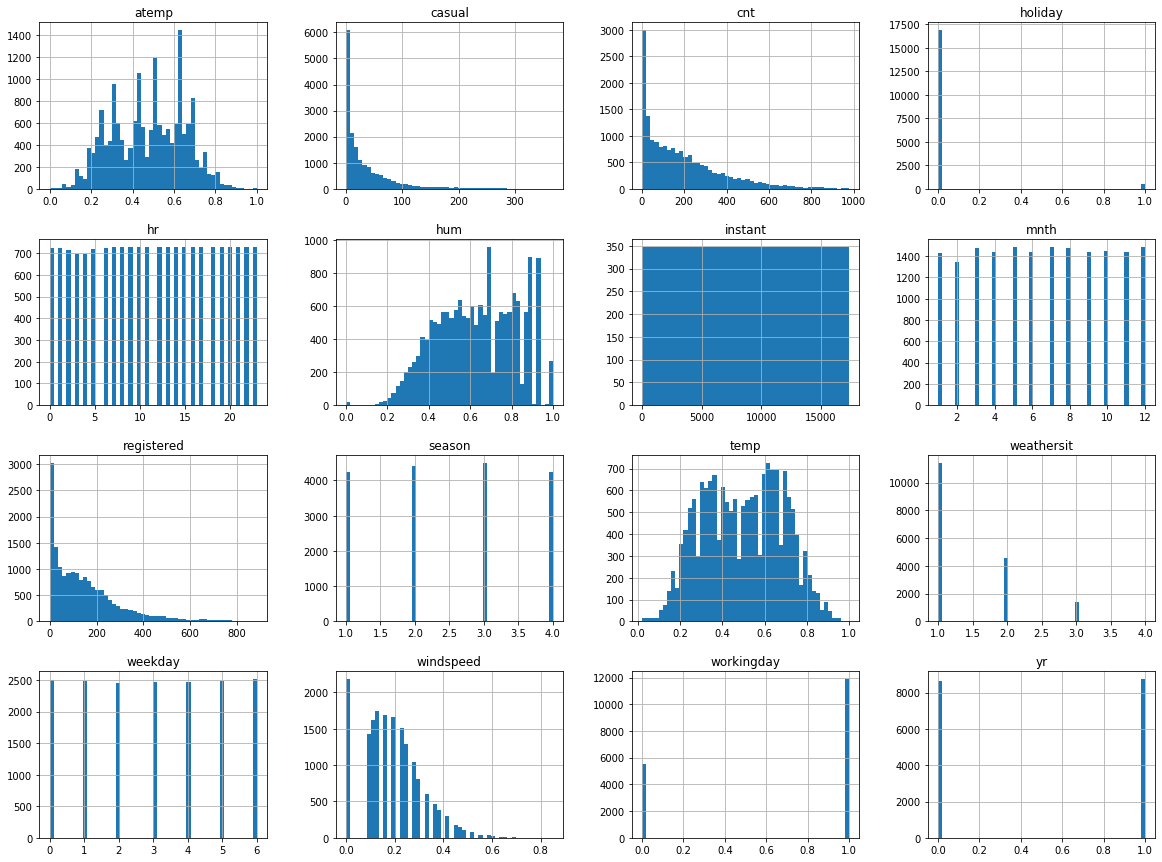

In [7]:
bike_sharing.hist(bins=50, figsize=(20,15))
plt.show()

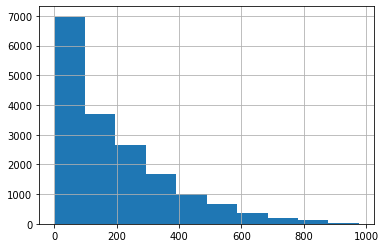

In [8]:
bike_sharing["cnt"].hist()

## Data visualization

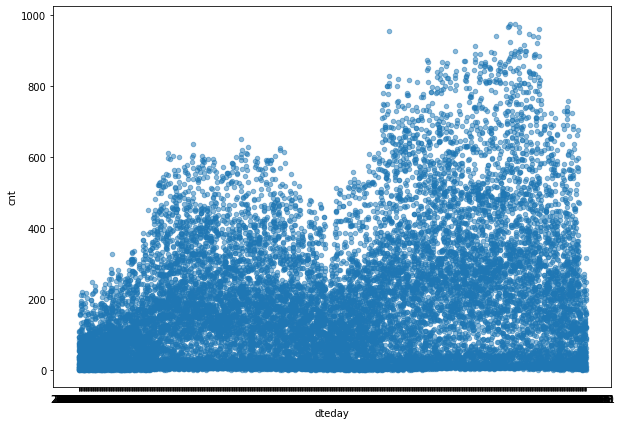

In [9]:
bike_sharing.plot(kind="scatter", x="dteday", y="cnt", figsize=(10,7), alpha=0.5)
plt.show()

There are 2 years - there are more counts in the second year

Drop the Date/object attribute `dteday`. 
Month and year are already also as spearated attributes. Add `day` as an new attribute.

In [10]:
bike_sharing["day"] = pd.to_datetime(bike_sharing['dteday'], format='%Y-%m-%d').dt.day

In [11]:
bike_sharing = bike_sharing.drop("dteday", axis=1)

Drop the `instant` attribute, as it is just the index of the record:

In [12]:
bike_sharing = bike_sharing.drop("instant", axis=1)

Drop `registered` and `casual`, as cnt = casual + registered

In [13]:
bike_sharing = bike_sharing.drop("registered", axis=1)
bike_sharing = bike_sharing.drop("casual", axis=1)

In [14]:
corr_matrix = bike_sharing.corr()

In [15]:
corr_matrix["cnt"].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
day          -0.004312
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

Scatter matrix with `cnt` and some correlated attributes:

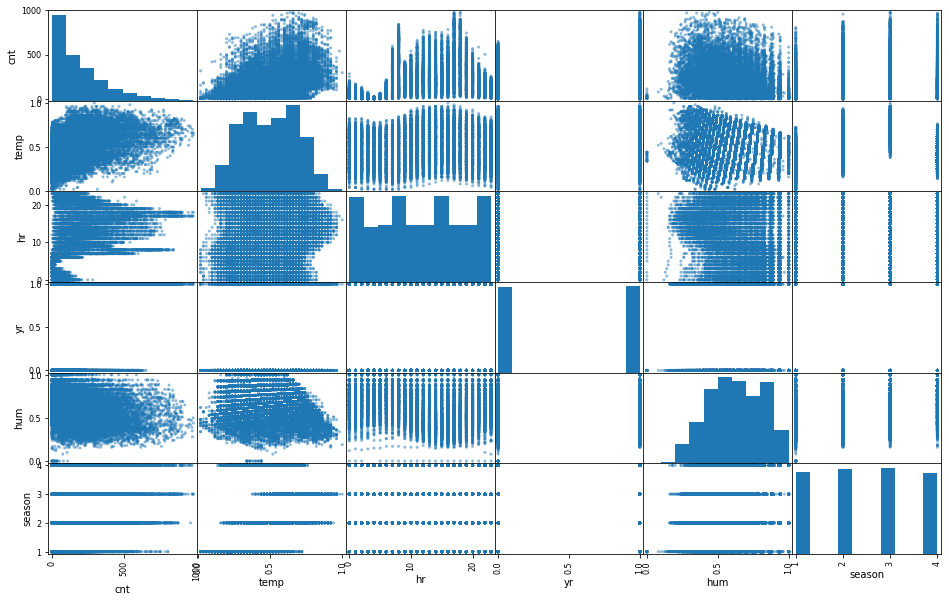

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["cnt", "temp", "hr", "yr", "hum", "season"]
scatter_matrix(bike_sharing[attributes], figsize=(16, 10))
plt.show()

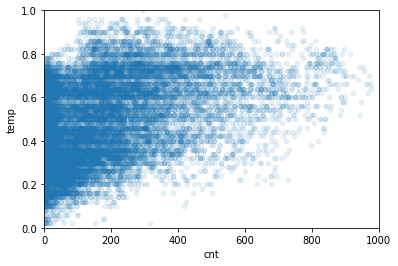

In [17]:
bike_sharing.plot(kind="scatter", x="cnt", y="temp",
             alpha=0.1)
plt.axis([0, 1000, 0, 1])
plt.show()

As expected, `temp` and `atemp` are correlated:

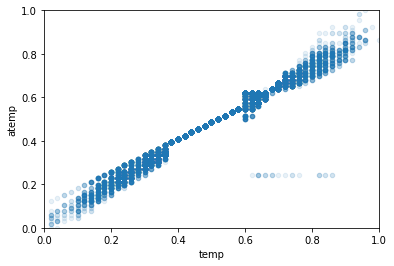

In [18]:
bike_sharing.plot(kind="scatter", x="temp", y="atemp",
             alpha=0.1)
plt.axis([0, 1, 0, 1])
plt.show()

So we are going to drop the `atemp` attribute:

In [19]:
bike_sharing = bike_sharing.drop("atemp", axis=1)

See the relationship between `cnt` and `month`. First for 2011...

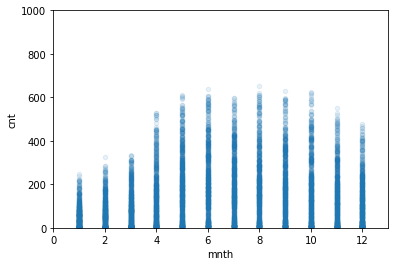

In [20]:
bike_sharing[bike_sharing['yr'] == 0].plot(kind="scatter", x="mnth", y="cnt",
             alpha=0.1)
plt.axis([0, 13, 0, 1000])
plt.show()

... and for 2012:

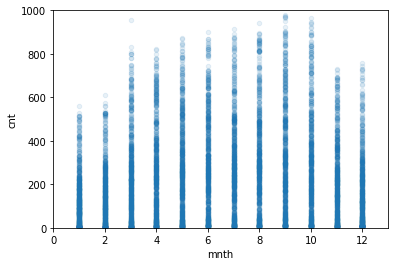

In [21]:
bike_sharing[bike_sharing['yr'] == 1].plot(kind="scatter", x="mnth", y="cnt",
             alpha=0.1)
plt.axis([0, 13, 0, 1000])
plt.show()

In [22]:
corr_matrix = bike_sharing.corr()
corr_matrix["cnt"].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
day          -0.004312
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

### Split the data in training and test sets

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bike_sharing, test_size=0.2, random_state=42)

In [24]:
test_set.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
12830,3,1,6,19,0,6,0,1,0.80,0.27,0.1940,425,23
8688,1,1,1,20,1,1,0,1,0.24,0.41,0.2239,88,2
7091,4,0,10,2,0,5,1,1,0.32,0.66,0.2836,4,28
12230,2,1,5,19,0,2,1,1,0.78,0.52,0.3582,526,29
431,1,0,1,0,0,4,1,1,0.26,0.56,0.3881,13,20


Stratify by `season`:

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bike_sharing, bike_sharing["season"]):
    strat_train_set = bike_sharing.loc[train_index]
    strat_test_set = bike_sharing.loc[test_index]

In [26]:
strat_test_set["season"].value_counts() / len(strat_test_set)

3    0.258631
2    0.253740
1    0.244246
4    0.243383
Name: season, dtype: float64

In [27]:
bike_sharing["season"].value_counts() / len(bike_sharing)

3    0.258703
2    0.253697
1    0.244088
4    0.243512
Name: season, dtype: float64

In [28]:
def season_proportions(data):
    return data["season"].value_counts() / len(data)

train_set, test_set = train_test_split(bike_sharing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": season_proportions(bike_sharing),
    "Stratified": season_proportions(strat_test_set),
    "Random": season_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

The stratified test set and the full dataset have almost the same proportions of season samples, compared to the random test set, especially for the seasons 3 and 4

In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.244088,0.244246,0.252877,3.600828,0.064964
2,0.253697,0.253740,0.258055,1.717894,0.016926
3,0.258703,0.258631,0.254028,-1.807252,-0.027994
4,0.243512,0.243383,0.235040,-3.479089,-0.053010


# Data preparation

In [30]:
bike_sharing_training = strat_train_set.drop("cnt", axis=1) # drop labels for training set
bike_sharing_labels = strat_train_set["cnt"].copy()

Expecting no incomplete rows, and **no imputation** later in the pipeline:

In [31]:
sample_incomplete_rows = bike_sharing_training[bike_sharing_training.isnull().any(axis=1)].head()
sample_incomplete_rows

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,day


Transform the categorical input feature `weathersit`in a binary attribute:

In [32]:
from sklearn.preprocessing import OneHotEncoder

weathersit_cat = bike_sharing["weathersit"]

weathersit_encoder = OneHotEncoder()
weathersit_cat_1hot = weathersit_encoder.fit_transform(weathersit_cat.values.reshape(-1, 1))
weathersit_cat_1hot

<17379x4 sparse matrix of type '<class 'numpy.float64'>'
	with 17379 stored elements in Compressed Sparse Row format>

Numerical attributes in a separate array:

In [33]:
bike_sharing_num = bike_sharing_training.drop("weathersit", axis=1)

In [34]:
bike_sharing_num.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'temp', 'hum', 'windspeed', 'day'],
      dtype='object')

Pipeline for preprocessing the numerical attributes:

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

bike_sharing_num_tr = num_pipeline.fit_transform(bike_sharing_num)

In [36]:
bike_sharing_num_tr

array([[-0.45331243, -1.00353065, -0.73822047, ..., -0.61442164,
         0.033017  ,  1.52418187],
       [ 0.45012832,  0.99648177, -0.1563576 , ...,  0.00798357,
         0.033017  ,  1.52418187],
       [-1.35675318,  0.99648177, -1.0291519 , ..., -1.13309265,
        -0.21054687, -0.18507642],
       ...,
       [ 0.45012832, -1.00353065,  0.42550527, ...,  0.78599009,
         0.52096207,  0.27072579],
       [ 0.45012832, -1.00353065,  0.42550527, ..., -1.70363076,
         0.88712521,  0.726528  ],
       [ 0.45012832,  0.99648177, -0.1563576 , ..., -1.80736497,
         1.37507029,  1.18233021]])

In [37]:
from sklearn.compose import ColumnTransformer

In [38]:
num_attribs = list(bike_sharing_num)
cat_attribs = ["weathersit"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

bike_sharing_prepared = full_pipeline.fit_transform(bike_sharing_training)

In [39]:
bike_sharing_prepared

array([[-0.45331243, -1.00353065, -0.73822047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45012832,  0.99648177, -0.1563576 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.35675318,  0.99648177, -1.0291519 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.45012832, -1.00353065,  0.42550527, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.45012832, -1.00353065,  0.42550527, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45012832,  0.99648177, -0.1563576 , ...,  0.        ,
         0.        ,  0.        ]])

In [40]:
bike_sharing_prepared.shape

(13903, 15)

# Select and train a model 

Start with a **Linear Regressor**:

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(bike_sharing_prepared, bike_sharing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# let's try the full preprocessing pipeline on a few training instances
some_data = bike_sharing_training.iloc[:5]
some_labels = bike_sharing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [227.69243984 397.84751633 283.96621816 214.46899376 247.82600046]


Compare against the actual values:

In [43]:
print("Labels:", list(some_labels))

Labels: [195, 48, 220, 75, 235]


In [44]:
some_data_prepared

array([[-4.53312429e-01, -1.00353065e+00, -7.38220465e-01,
         1.36839102e+00, -1.71891829e-01,  9.91715780e-01,
         6.81015307e-01, -1.93317709e-01, -6.14421641e-01,
         3.30169999e-02,  1.52418187e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.50128325e-01,  9.96481770e-01, -1.56357597e-01,
         1.65657480e+00, -1.71891829e-01,  9.91715780e-01,
         6.81015307e-01,  1.67681759e+00,  7.98357162e-03,
         3.30169999e-02,  1.52418187e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.35675318e+00,  9.96481770e-01, -1.02915190e+00,
        -7.25278747e-02, -1.71891829e-01, -5.66735725e-03,
         6.81015307e-01,  6.37853534e-01, -1.13309265e+00,
        -2.10546873e-01, -1.85076417e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35356908e+00, -1.00353065e+00,  1.00736814e+00,
         1.65657480e+00,  5.81761218e+00, -1.00305049

In [45]:
from sklearn.metrics import mean_squared_error

bike_sharing_predictions = lin_reg.predict(bike_sharing_prepared)
lin_mse = mean_squared_error(bike_sharing_labels, bike_sharing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

141.8025038378215

In [46]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(bike_sharing_labels, bike_sharing_predictions)
lin_mae

106.1100788358487

Try a **Decision Tree Regressor**:

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(bike_sharing_prepared, bike_sharing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [48]:
bike_sharing_predictions = tree_reg.predict(bike_sharing_prepared)
tree_mse = mean_squared_error(bike_sharing_labels, bike_sharing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tuning

Use **cross validation**:

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, bike_sharing_prepared, bike_sharing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

60.547769624432206

In [50]:
lin_scores = cross_val_score(lin_reg, bike_sharing_prepared, bike_sharing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean()

141.88473987264575

Try a **Random Forest Regressor**:

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(bike_sharing_prepared, bike_sharing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [52]:
bike_sharing_predictions = forest_reg.predict(bike_sharing_prepared)
forest_mse = mean_squared_error(bike_sharing_labels, bike_sharing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18.92938841237093

In [53]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, bike_sharing_prepared, bike_sharing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores.mean()

45.2706024412161

In [54]:
scores = cross_val_score(lin_reg, bike_sharing_prepared, bike_sharing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean     141.884740
std        4.540497
min      136.027367
25%      139.030467
50%      141.125567
75%      143.880250
max      149.131948
dtype: float64

Try a **Support Vector Regressor**:

In [55]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(bike_sharing_prepared, bike_sharing_labels)
bike_sharingg_predictions = svm_reg.predict(bike_sharing_prepared)
svm_mse = mean_squared_error(bike_sharing_labels, bike_sharing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

18.92938841237093

For the `Random Forest Regressor`, search the optimal combination of hyperparameters thorough a **Grid Search**:

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(bike_sharing_prepared, bike_sharing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

The best hyperparameter combination found:

In [57]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Score of each hyperparameter combination tested during the grid search:

In [59]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

104.27348301050182 {'max_features': 2, 'n_estimators': 3}
87.92282987485028 {'max_features': 2, 'n_estimators': 10}
82.06989747103306 {'max_features': 2, 'n_estimators': 30}
80.5510700652168 {'max_features': 4, 'n_estimators': 3}
64.47277555479522 {'max_features': 4, 'n_estimators': 10}
61.44892126985661 {'max_features': 4, 'n_estimators': 30}
65.98621942969021 {'max_features': 6, 'n_estimators': 3}
53.39196694728802 {'max_features': 6, 'n_estimators': 10}
50.39563362316379 {'max_features': 6, 'n_estimators': 30}
58.43265498073054 {'max_features': 8, 'n_estimators': 3}
48.09888813112131 {'max_features': 8, 'n_estimators': 10}
45.33450469843186 {'max_features': 8, 'n_estimators': 30}
103.90790701549108 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
83.88482639657178 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
84.29419983341262 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
70.01117543750927 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [60]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053262,0.002409,0.003387,0.000482,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-9229.553518,-12205.519278,...,-10872.959259,1042.811116,18,-2837.572579,-3023.941327,-3101.062599,-2720.179438,-3059.731198,-2948.497428,145.447098
1,0.157868,0.004500,0.010743,0.003061,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-6145.962474,-8654.841244,...,-7730.424013,841.244708,16,-1267.108498,-1493.362599,-1573.160782,-1486.129058,-1521.370168,-1468.226221,105.105879
2,0.464119,0.008670,0.026528,0.000488,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-5781.004037,-7629.209409,...,-6735.468071,628.692073,13,-967.514456,-1058.293827,-1053.842879,-1057.402974,-1043.048056,-1036.020438,34.679715
3,0.064771,0.001358,0.002785,0.001460,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-6354.990811,-6340.790483,...,-6488.474889,118.461739,12,-1774.233112,-1698.799746,-1940.577814,-1741.621625,-1751.095358,-1781.265531,83.321477
4,0.209458,0.008679,0.010505,0.002587,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3590.674477,-4176.359561,...,-4156.738788,365.737590,8,-780.839857,-803.852928,-940.945887,-932.248143,-792.177044,-850.012772,71.122545
5,0.611896,0.013777,0.030053,0.003741,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-3438.784084,-3550.525753,...,-3775.969925,331.898444,7,-587.354347,-564.494347,-628.544933,-658.599181,-606.786256,-609.155813,32.545814
6,0.079763,0.002686,0.002780,0.001460,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-4020.259619,-4760.885133,...,-4354.181155,419.788877,9,-1195.953546,-1288.521209,-1296.768282,-1338.943411,-1260.366258,-1276.110541,47.332363
7,0.259563,0.007832,0.007379,0.003710,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2929.022826,-2868.472851,...,-2850.702135,136.731276,4,-613.414452,-581.315128,-591.736649,-615.272852,-547.881841,-589.924184,24.654846
8,0.830877,0.056029,0.028126,0.002554,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2574.116313,-2585.352879,...,-2539.719888,138.087716,3,-425.287494,-412.929317,-423.019789,-429.103512,-388.300200,-415.728062,14.721245
9,0.168809,0.017740,0.002592,0.003190,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3245.389788,-3669.932718,...,-3414.375168,166.639740,5,-880.976483,-1011.182331,-923.007613,-816.043084,-879.530083,-902.147919,64.338898


Same `Random Forest Regressor`, but find the optimal hyperparameters with a **Randomized Search**:

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(bike_sharing_prepared, bike_sharing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [62]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

45.05638038572265 {'max_features': 7, 'n_estimators': 180}
56.41471482192496 {'max_features': 5, 'n_estimators': 15}
67.98185066476188 {'max_features': 3, 'n_estimators': 72}
55.40639406763277 {'max_features': 5, 'n_estimators': 21}
45.208353883487014 {'max_features': 7, 'n_estimators': 122}
67.78230218063415 {'max_features': 3, 'n_estimators': 75}
67.70730976698599 {'max_features': 3, 'n_estimators': 88}
53.55997923749486 {'max_features': 5, 'n_estimators': 100}
67.44170759102907 {'max_features': 3, 'n_estimators': 150}
73.43382930219227 {'max_features': 5, 'n_estimators': 2}


Back to the Grid Search - show the **feature importances**:

In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.41295392e-02, 7.73397388e-02, 2.71353423e-02, 5.31015197e-01,
       2.11934749e-03, 2.54164182e-02, 5.12195003e-02, 1.36751540e-01,
       6.99617644e-02, 1.71035531e-02, 1.98187931e-02, 4.79276681e-03,
       2.72355362e-03, 1.04719025e-02, 1.04314364e-06])

In [64]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5310151972243101, 'hr'),
 (0.13675153983436236, 'temp'),
 (0.07733973875579674, 'yr'),
 (0.06996176444148781, 'hum'),
 (0.051219500279621764, 'workingday'),
 (0.02713534229482164, 'mnth'),
 (0.02541641820615188, 'weekday'),
 (0.024129539171948988, 'season'),
 (0.019818793132863825, 'day'),
 (0.017103553139654414, 'windspeed'),
 (0.010471902459336742, 3),
 (0.004792766808368701, 1),
 (0.0027235536216307257, 2),
 (0.0021193474860059405, 'holiday'),
 (1.043143638437541e-06, 4)]

Calculate **RMSE** for the `Random Forest Regressor`, with the hyperparmeters found by the grid search:

In [65]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("cnt", axis=1)
y_test = test_set["cnt"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [66]:
final_rmse

24.33307903114959

**Predict pipeline** using the `Random Forest Regressor`:

In [67]:
predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('forest_reg', RandomForestRegressor(**grid_search.best_params_))
])

Fit the training dataset on the predict pipeline:

In [68]:
predict_pipeline.fit(bike_sharing_training, bike_sharing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('std_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                

**Some predictions with test data**:

In [69]:
bike_sharing_testing = strat_test_set.drop("cnt", axis=1) # drop labels for training set
bike_sharing_testing_labels = strat_test_set["cnt"].copy()

In [70]:
some_data = bike_sharing_testing.iloc[:7]
some_labels = bike_sharing_testing_labels.iloc[:7]

#to print the predictions in decimal format, not the scientific one
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

print("Predictions:\t", predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [294.766667 68.566667 10.433333 70.133333 118.266667 88.900000 99.866667]
Labels:		 [340, 93, 13, 52, 155, 81, 65]
